<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>Plotly</h1>
<h2>COVID-19 Cases</h2>
<h3>Kelsey Malloy</h3>




<div style="clear:both"></div>
</div>

<hr style="height:2px;">

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import plotly
import plotly.graph_objects as go
import plotly.io as pio
import chart_studio
import seaborn as sns

# COVID-19 by country

In [43]:
f = pd.ExcelFile("../_data/COVID-19-geographic-disbtribution-worldwide-2020-04-02.xlsx")
d = f.parse("COVID-19-geographic-disbtributi")
d.head

<bound method NDFrame.head of         dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0    2020-04-02    2      4  2020     26       0             Afghanistan   
1    2020-04-01    1      4  2020     25       0             Afghanistan   
2    2020-03-31   31      3  2020     27       0             Afghanistan   
3    2020-03-30   30      3  2020      8       1             Afghanistan   
4    2020-03-29   29      3  2020     15       1             Afghanistan   
5    2020-03-28   28      3  2020     16       1             Afghanistan   
6    2020-03-27   27      3  2020      0       0             Afghanistan   
7    2020-03-26   26      3  2020     33       0             Afghanistan   
8    2020-03-25   25      3  2020      2       0             Afghanistan   
9    2020-03-24   24      3  2020      6       1             Afghanistan   
10   2020-03-23   23      3  2020     10       0             Afghanistan   
11   2020-03-22   22      3  2020      0       0          

In [44]:
df = pd.DataFrame(data=d)
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
1,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
2,2020-03-31,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
3,2020-03-30,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
4,2020-03-29,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
5,2020-03-28,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
6,2020-03-27,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
7,2020-03-26,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
8,2020-03-25,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
9,2020-03-24,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0


In [45]:
df = df[df.cases != 0] # only where cases exist
df = df[df.dateRep == '2020-04-02'] # today's date
df = df.drop(columns=['geoId','countryterritoryCode'])
#df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,popData2018
0,2020-04-02,2,4,2020,26,0,Afghanistan,37172386.0
84,2020-04-02,2,4,2020,1,0,Angola,30809762.0
89,2020-04-02,2,4,2020,16,0,Albania,2866376.0
114,2020-04-02,2,4,2020,14,2,Andorra,77006.0
134,2020-04-02,2,4,2020,263,23,Algeria,42228429.0
251,2020-04-02,2,4,2020,167,7,Argentina,44494502.0
278,2020-04-02,2,4,2020,39,0,Armenia,2951776.0
374,2020-04-02,2,4,2020,269,1,Australia,24992369.0
468,2020-04-02,2,4,2020,529,18,Austria,8847037.0
562,2020-04-02,2,4,2020,61,0,Azerbaijan,9942334.0


In [46]:
df['casePercent'] = (df.cases / df.cases.sum()) * 100.
df = df[df.casePercent >= 1]

In [47]:
df['deathPercent'] = (df.deaths / df.deaths.sum()) * 100.

C:\Users\kelse\Anaconda3\envs\LB_20190503\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [48]:
df.loc[df.countriesAndTerritories == 'United_States_of_America','countriesAndTerritories'] == 'USA'
#df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,popData2018,casePercent,deathPercent
879,2020-04-02,2,4,2020,1189,123,Belgium,11422068.0,1.541593,2.682661
1079,2020-04-02,2,4,2020,1119,40,Brazil,209469333.0,1.450835,0.872410
1353,2020-04-02,2,4,2020,1059,13,Canada,37058856.0,1.373042,0.283533
2713,2020-04-02,2,4,2020,4861,509,France,66987244.0,6.302510,11.101418
2949,2020-04-02,2,4,2020,6156,140,Germany,82927922.0,7.981537,3.053435
3642,2020-04-02,2,4,2020,2987,138,Iran,81800269.0,3.872783,3.009815
4024,2020-04-02,2,4,2020,4782,727,Italy,60431283.0,6.200083,15.856052
5357,2020-04-02,2,4,2020,1019,134,Netherlands,17231017.0,1.321180,2.922574
6248,2020-04-02,2,4,2020,808,27,Portugal,10281762.0,1.047609,0.588877
7098,2020-04-02,2,4,2020,7719,864,Spain,46723749.0,10.008039,18.844057


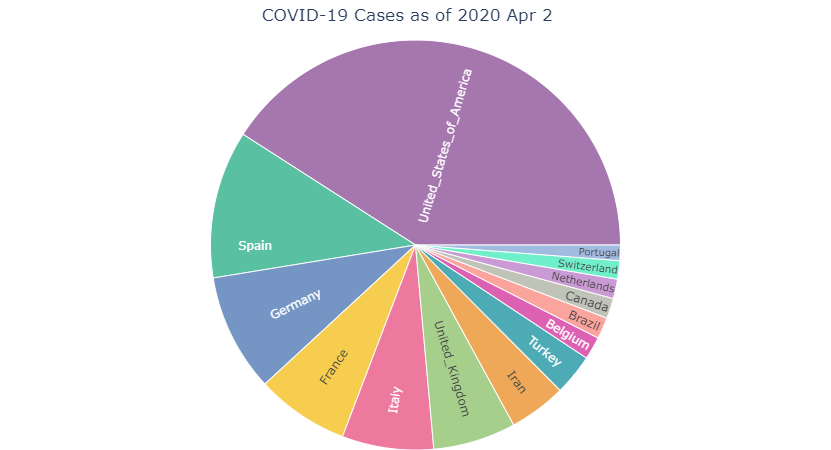

In [64]:
import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig=(px.sunburst(df, path=['countriesAndTerritories'], values='cases', color_discrete_sequence=px.colors.qualitative.Bold))
fig.update_traces(insidetextorientation='radial')
fig.update_traces(customdata=df['casePercent'],hovertemplate="<b>%{label} </b> <br> # of Cases: %{value}<br> Percentage of total: %{customdata:.2f}%")
fig.update_layout(title={
        'text': "COVID-19 Cases as of 2020 Apr 2",
        'y':0.98,
        'x':0.49,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(margin = dict(t=40, l=0, r=0, b=0))
fig.show(renderer='plotly_mimetype')


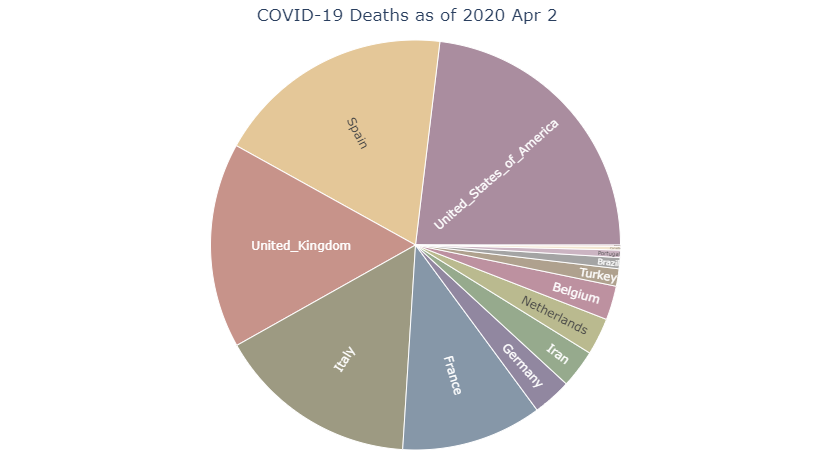

In [62]:
import plotly.express as px
from plotly.subplots import make_subplots

fig = px.sunburst(df, path=['countriesAndTerritories'], values='deaths', color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_traces(insidetextorientation='radial')
fig.update_traces(customdata=df['deathPercent'],hovertemplate="<b>%{label} </b> <br> # of Deaths: %{value}<br> Percentage of total: %{customdata:.2f}%")
fig.update_layout(title={
        'text': "COVID-19 Deaths as of 2020 Apr 2",
        'y':0.98,
        'x':0.49,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_layout(margin = dict(t=40, l=0, r=0, b=0))
fig.show(renderer='plotly_mimetype')


# COVID-19 deaths-to-positives ratio in each state separated by race

In [34]:
positives = pd.read_excel("../_data/COVID_positives_race.xlsx")
print(positives.head())
print(positives.shape)

  State  Total    White   Black   LatinX   Asian  Native American  \
0    AK    408    263.0    10.0      NaN    46.0             33.0   
1    AL  14478   5796.0  5972.0      NaN    79.0              NaN   
2    AR   5922   2862.0  2110.0      NaN    61.0             22.0   
3    AZ  16339   3452.0   529.0   3312.0   181.0           1929.0   
4    CA  92710  14218.0  3660.0  35760.0  6518.0            126.0   

   Native Hawaiian/ Pacific Islander  Multiracial   Other  Unknown  
0                               14.0         15.0    12.0     15.0  
1                                NaN          NaN   581.0   2047.0  
2                              172.0          NaN   321.0    374.0  
3                                NaN          NaN   382.0   6554.0  
4                              565.0        562.0  3780.0  27521.0  
(51, 11)


In [35]:
deaths = pd.read_excel("../_data/COVID_deaths_race.xlsx")
print(deaths.head())
print(deaths.shape)
#print(deaths.iloc[:,0])

  State  Total   White  Black  LatinX  Asian  Native American  \
0    AK     10     NaN    NaN     NaN    NaN              NaN   
1    AL    551   281.0  239.0     NaN    3.0              NaN   
2    AR    116    64.0   44.0     NaN    1.0              NaN   
3    AZ    800   335.0   23.0   126.0   11.0            132.0   
4    CA   3774  1228.0  360.0  1357.0  528.0             14.0   

   Native Hawaiian/ Pacific Islander  Multiracial  Other  Unknown  
0                                NaN          NaN    NaN     10.0  
1                                NaN          NaN    7.0     21.0  
2                                2.0          NaN    5.0      NaN  
3                                NaN          NaN   12.0    161.0  
4                               28.0         24.0   35.0    200.0  
(51, 11)


In [36]:
#positives = positives[deaths['White'].notna()]
#deaths = deaths[deaths['White'].notna()]
print(deaths.shape,positives.shape)
states = deaths.iloc[:,0]

(51, 11) (51, 11)


In [41]:
mortalityrate = (deaths.iloc[:,1:] / positives.iloc[:,1:]) * 100
print(mortalityrate.head())

      Total     White     Black    LatinX     Asian  Native American  \
0  2.450980       NaN       NaN       NaN       NaN              NaN   
1  3.805774  4.848171  4.002009       NaN  3.797468              NaN   
2  1.958798  2.236198  2.085308       NaN  1.639344              NaN   
3  4.896260  9.704519  4.347826  3.804348  6.077348         6.842924   
4  4.070758  8.636939  9.836066  3.794743  8.100644        11.111111   

   Native Hawaiian/ Pacific Islander  Multiracial     Other    Unknown  
0                                NaN          NaN       NaN  66.666667  
1                                NaN          NaN  1.204819   1.025892  
2                           1.162791          NaN  1.557632        NaN  
3                                NaN          NaN  3.141361   2.456515  
4                           4.955752     4.270463  0.925926   0.726718  


In [42]:
mortalityrate.insert(loc=0,column='States',value=states)
#mortalityrate = mortalityrate.drop(columns=['Total Deaths', 'Total Positives'])
#mortalityrate = mortalityrate[['White','Black','LatinX','Native American','Native Hawaiian/ Pacific Islander','Multiracial','Other','Unknown']]
mortalityrate.rename(columns={"Native Hawaiian/ Pacific Islander": "Native Hawaiian\nPacific Islander"})
mortalityrate[mortalityrate['Unknown']>20] = np.nan
print(mortalityrate.head())

  States     Total     White     Black    LatinX     Asian  Native American  \
0    NaN       NaN       NaN       NaN       NaN       NaN              NaN   
1     AL  3.805774  4.848171  4.002009       NaN  3.797468              NaN   
2     AR  1.958798  2.236198  2.085308       NaN  1.639344              NaN   
3     AZ  4.896260  9.704519  4.347826  3.804348  6.077348         6.842924   
4     CA  4.070758  8.636939  9.836066  3.794743  8.100644        11.111111   

   Native Hawaiian/ Pacific Islander  Multiracial     Other   Unknown  
0                                NaN          NaN       NaN       NaN  
1                                NaN          NaN  1.204819  1.025892  
2                           1.162791          NaN  1.557632       NaN  
3                                NaN          NaN  3.141361  2.456515  
4                           4.955752     4.270463  0.925926  0.726718  


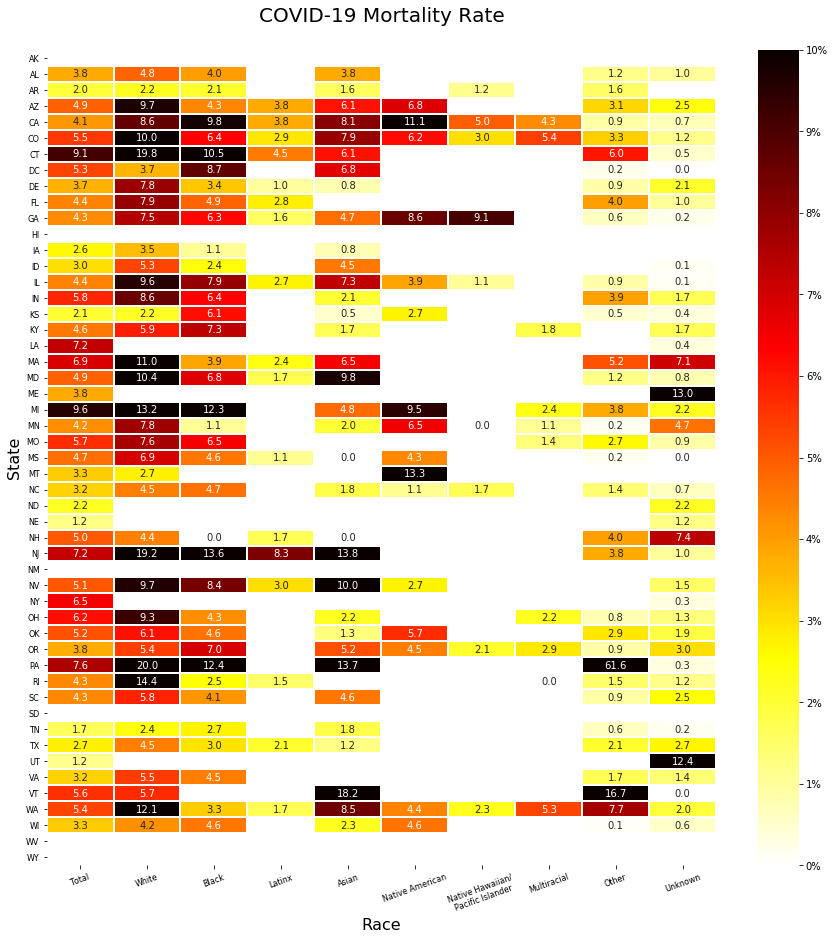

In [48]:
f, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(mortalityrate.iloc[:,1:], cbar_kws={'format': '%.0f%%', 'ticks': np.arange(0,10+1,1)}, vmax=10, vmin=0, annot=True, fmt = '.1f',cmap='hot_r', linewidths=1, ax=ax)
hm.set_ylabel('State',fontsize=16)
hm.set_xlabel('Race',fontsize=16)
hm.set_xticklabels(['Total','White','Black','Latinx','Asian','Native American','Native Hawaiian/\nPacific Islander','Multiracial','Other','Unknown'],rotation=20,fontsize=8)
hm.set_yticklabels(deaths.iloc[:,0],rotation=0,fontsize=8)
cbar = ax.collections[0].colorbar
hm.set_title('COVID-19 Mortality Rate\n',fontsize=20)
f.savefig('../_images/mortalityrate_race.png')

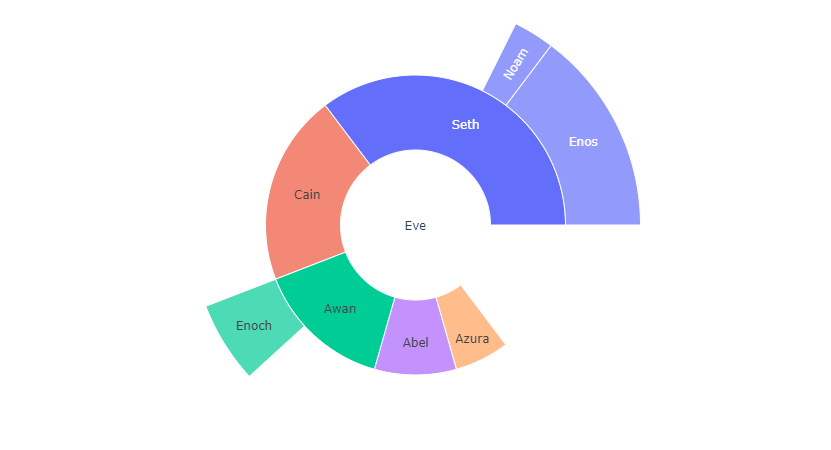

In [37]:
# original script for a sunburst

fig =go.Figure(go.Sunburst(
    labels=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    values=[10, 14, 12, 10, 2, 6, 6, 4, 4],
))
# Update layout for tight margin
# See https://plotly.com/python/creating-and-updating-figures/
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show(renderer='plotly_mimetype')